In [1]:
import sys
sys.path.append('../')

In [2]:
import libs.db
import libs.prep_df
import pandas as pd
import sqlite3



In [3]:
sql_file = "sp10_not_normalized.db"
conn = libs.db.create_connection(sql_file)
df = libs.db.df_from_db(conn)
libs.db.close_connection(conn)
df.head()

,id,symbol,timestamp,close
0,1,AAPL,2017-01-03T09:00:00+00:00,116.05
1,2,AAPL,2017-01-03T10:00:00+00:00,116.02
2,3,AAPL,2017-01-03T11:00:00+00:00,116.28
3,4,AAPL,2017-01-03T12:00:00+00:00,116.02
4,5,AAPL,2017-01-03T13:00:00+00:00,116.20


In [4]:
norm_df = libs.prep_df.normalize_df(df)
aapl_df = pd.DataFrame(norm_df["AAPL"])
aapl_df.head()

,AAPL
timestamp,
2017-01-03 09:00:00+00:00,116.05
2017-01-03 10:00:00+00:00,116.02
2017-01-03 11:00:00+00:00,116.28
2017-01-03 12:00:00+00:00,116.02
2017-01-03 13:00:00+00:00,116.20


In [5]:
num_ticks = 60
for i in range(1,num_ticks):
    name = f"AAPL-{i}"
    aapl_df[name] = aapl_df["AAPL"].shift(i)
aapl_df.iloc[10:30,:]

,AAPL,AAPL-1,AAPL-2,AAPL-3,AAPL-4,AAPL-5,AAPL-6,AAPL-7,AAPL-8,AAPL-9,...,AAPL-50,AAPL-51,AAPL-52,AAPL-53,AAPL-54,AAPL-55,AAPL-56,AAPL-57,AAPL-58,AAPL-59
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 19:00:00+00:00,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,116.2800,116.0200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 20:00:00+00:00,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,116.2800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 21:00:00+00:00,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,116.0200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 22:00:00+00:00,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,116.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 23:00:00+00:00,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,115.6700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00+00:00,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,115.4500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 09:00:00+00:00,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,115.3757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 10:00:00+00:00,116.2700,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,115.4650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 11:00:00+00:00,116.0800,116.2700,116.2700,116.0700,116.0200,116.0100,116.1500,116.1400,115.4300,115.2350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
returns_df = pd.DataFrame()
returns_df["AAPL_24_Return"] = aapl_df["AAPL"].pct_change(periods=16).shift(-16)
returns_df["AAPL_buy"] = returns_df["AAPL_24_Return"].apply(lambda x: 1 if x > 0.005 else 0)
returns_df.tail()

,AAPL_24_Return,AAPL_buy
timestamp,,
2021-06-24 19:00:00+00:00,NaN,0
2021-06-24 20:00:00+00:00,NaN,0
2021-06-24 21:00:00+00:00,NaN,0
2021-06-24 22:00:00+00:00,NaN,0
2021-06-24 23:00:00+00:00,NaN,0


In [7]:
aapl_df = aapl_df.pct_change()
aapl_df = pd.concat([aapl_df, returns_df], axis=1)
aapl_df.dropna(inplace=True)
aapl_df.describe()

,AAPL,AAPL-1,AAPL-2,AAPL-3,AAPL-4,AAPL-5,AAPL-6,AAPL-7,AAPL-8,AAPL-9,...,AAPL-52,AAPL-53,AAPL-54,AAPL-55,AAPL-56,AAPL-57,AAPL-58,AAPL-59,AAPL_24_Return,AAPL_buy
count,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,...,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000
mean,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000056,0.000056,0.000056,...,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000846,0.391853
std,0.007634,0.007634,0.007634,0.007634,0.007634,0.007634,0.007634,0.007634,0.007634,0.007634,...,0.007634,0.007634,0.007634,0.007634,0.007634,0.007634,0.007634,0.007634,0.029546,0.488178
min,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,...,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.736762,-0.738819,0.000000
25%,-0.001251,-0.001251,-0.001251,-0.001251,-0.001251,-0.001251,-0.001251,-0.001251,-0.001251,-0.001251,...,-0.001251,-0.001251,-0.001251,-0.001251,-0.001251,-0.001252,-0.001251,-0.001251,-0.007000,0.000000
50%,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.001553,0.000000
75%,0.001586,0.001586,0.001586,0.001586,0.001586,0.001587,0.001587,0.001587,0.001587,0.001587,...,0.001585,0.001585,0.001585,0.001585,0.001584,0.001584,0.001585,0.001585,0.010505,1.000000
max,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,...,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.159012,0.176167,1.000000


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = aapl_df.iloc[:,0:60].values
y = aapl_df["AAPL_24_Return"].values

In [10]:
aapl_model = LinearRegression()
aapl_model.fit(X,y)
y

array([ 0.00881655,  0.00907241,  0.00967085, ..., -0.00209455,
       -0.00216968, -0.00231949])

<AxesSubplot:>

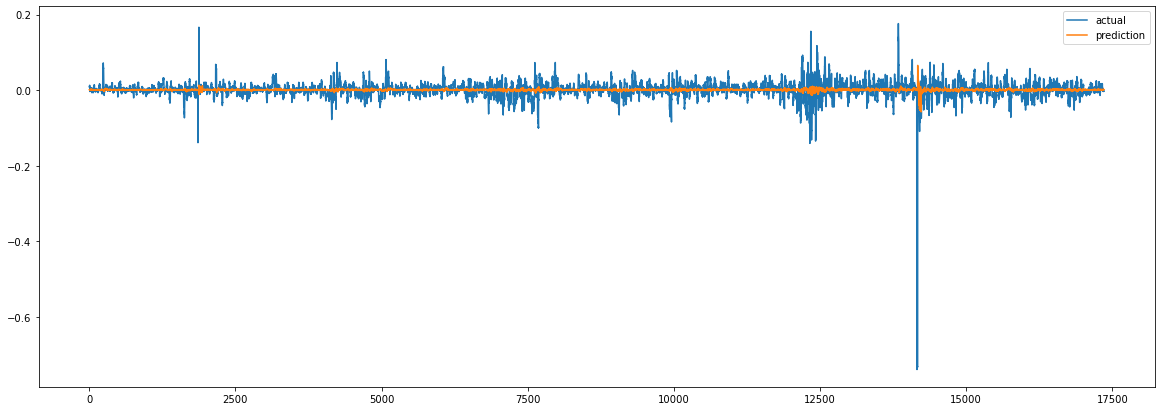

In [11]:
predicted_y_values = aapl_model.predict(X)

pd.DataFrame({ "actual": y,"prediction": predicted_y_values}).plot(figsize=(20,7))

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = aapl_model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.006880109706075999.
The r2 is 0.006880109706075999.
The mean squared error is 0.0008669074199902178.
The root mean squared error is 0.02944329159571358.
The standard deviation is 0.029545103795435932.


In [13]:
aapl_model.coef_.shape

(60,)

In [14]:
pred_df = pd.DataFrame({"actual": y, "predicted":predicted_y_values})

In [15]:
# Now do logistic regression
X = aapl_df.iloc[:,0:60].values
y = aapl_df["AAPL_buy"].values

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6085887685334562
Testing Data Score: 0.6077437197510948


In [18]:
predictions = classifier.predict(X_test)
np.sum(predictions)

2

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[2637,    2],
       [1700,    0]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
target_names = ["Not Buy", "Buy"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Not Buy       0.61      1.00      0.76      2639
         Buy       0.00      0.00      0.00      1700

    accuracy                           0.61      4339
   macro avg       0.30      0.50      0.38      4339
weighted avg       0.37      0.61      0.46      4339



In [25]:
print (f"{np.sum(y_test)} {np.sum(predictions)}")

1700 2


In [27]:
#Now do Random Forest
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [31]:
print (f"{np.sum(y_test)} {np.sum(rf_predictions)}")

1700 160


In [33]:
cm = confusion_matrix(y_test, rf_predictions)
print(cm)

[[2554   85]
 [1625   75]]


In [34]:
target_names = ["Not Buy", "Buy"]
print(classification_report(y_test, rf_predictions, target_names=target_names))

              precision    recall  f1-score   support

     Not Buy       0.61      0.97      0.75      2639
         Buy       0.47      0.04      0.08      1700

    accuracy                           0.61      4339
   macro avg       0.54      0.51      0.41      4339
weighted avg       0.56      0.61      0.49      4339



In [35]:
#Now try gradient boosted tree
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)
classifier.fit(X_train, y_train)
gboost_predictions = classifier.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, gboost_predictions)
print(cm)

[[2346  293]
 [1463  237]]


In [39]:
target_names = ["Not Buy", "Buy"]
print(classification_report(y_test, gboost_predictions, target_names=target_names))

              precision    recall  f1-score   support

     Not Buy       0.62      0.89      0.73      2639
         Buy       0.45      0.14      0.21      1700

    accuracy                           0.60      4339
   macro avg       0.53      0.51      0.47      4339
weighted avg       0.55      0.60      0.53      4339

